# Classification Models for Preidcting Headlight Control for Shared Bikes


In [ ]:
%pip install pandas
%pip install numpy
%pip install -U "scikit-learn==0.23.1"
%pip install graphviz
%pip install pydotplus
%pip install six
import numpy as np
import pandas as pd
import io
import matplotlib.pyplot as plt
#from scipy import stats
import seaborn as sns
from scipy.stats import zscore
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import (roc_curve, auc, roc_auc_score, confusion_matrix)
import itertools
from sklearn import metrics
from sklearn.tree import export_graphviz
from six import StringIO
from IPython.display import Image
import pydotplus
from sklearn.naive_bayes import GaussianNB

     |████████████████████████████████| 6.8MB 4.4MB/s 
  Found existing installation: scikit-learn 0.22.2.post1
    Uninstalling scikit-learn-0.22.2.post1:
      Successfully uninstalled scikit-learn-0.22.2.post1


***
# Section: 1 - Evaluation Method
- Define measures for evaluating the classification models you develop.  Explain why the measures you choose provide a useful view into the value and usefulness of the model you eventually chose for the company to use.  Define two types:
***

***
## Section: 1.1 - Define measures that do not include the cost information
- (e.g., confusion matrices, accuracy, precision, recall, F-measures, etc.).
***


All these measures are based on Confusion Matrix.

1. Since the class label we're trying to predict is not rare class, so we could use accuracy to evaluate the performance of my classifiers. Accuracy measures how many correct predictions the model made out of all the predictions.
- Accuracy = (TP+TN) / (TP+TN+FP+FN)  
- ErrorRate = 1 - Accuracy

2. Precision measures the proportion of correct predictions the model made out of all the class it predicted as positive. (assuming we define positive class to be "TRUE" for "IsitDay")
- Precision(p) = TP / (TP+FP)

3. Recall measures the proportion of correct predictions the model made out of all the classes that are actually positive. (assuming we define positive class to be "TRUE" for "IsitDay")
- Recall(r) = TPR = TP / (TP+FN)
- FNR = FN / (FN+TP) = 1 - r

4. F-measure is created when we combine precision and recall into one metric.
- F-measure = 2rp / (r+p)

5. Specificity measures the proportion of correct predictions the model made out of all the classes that are actually negative. (assuming we define positive class to be "TRUE" for "IsitDay")
- Specificity = TNR = TN / (TN+FP)
- FPR = 1 - specificity


***
## Section: 1.2 - Define measures that do include the cost information
- (e.g., using cost matrices).
***

All these measures are based on Cost Matrix and Confusion Matrix.
Given a cost matrix, we can compute the cost of a classification model by multiplication. So we have cost sensitive classification. It takes the cost matrix into consideration during model building and generates a model that has the lowest cost.
- k = argmin sum(p(i|x) * C(i,j)), where p(i|x) is the fraction of training records from class i that belons to the leaf node x, and C(i,j) is the cost of predicting a record from class i as class j.

For our class label "IsitDay", which is binary, we can classify the test record x as "TRUE" if Cost("TRUE") < Cost("FALSE"), that is if p("FALSE"|x)*C("FALSE","TRUE") < p("TRUE"|x)*C("TRUE","FALSE"), that is if p("TRUE"|x) > C("FALSE","TRUE")/(C("FALSE","TRUE")+C("TRUE","FALSE"))



***
# Section: 2 - Pre-Processing of the Dataset
- Use the altered_seoulbikedata_train.  Split it into a Training dataset and a validation dataset.  Keep them separate and use the Training dataset for training/tuning and the validation dataset for hyperparameter tuning. Or you can use cross validation - https://scikit-learn.org/stable/modules/cross_validation.html.
***

In [ ]:
url_train = "https://raw.githubusercontent.com/CristoDragon/CSE5243/main/altered_seoulbokedata_train.csv"
bikedata = pd.read_csv(url_train, encoding= 'unicode_escape')
url_test = "https://raw.githubusercontent.com/CristoDragon/CSE5243/main/altered_seoulbikedata_test.csv"
bikedata_test = pd.read_csv(url_test, encoding= 'unicode_escape')
# We split it into a training dataset and a validation dataset
bike_train, bike_validation = train_test_split(bikedata,test_size=0.2,random_state=123)
bike_train



,Date,Rented Bike Count,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day,IsitDay
6973,25/08/2018,2080,27.1,56,3.0,1987,17.5,0.87,0.0,0.0,Summer,No Holiday,Yes,True
1404,10/2/2018,124,-5.6,28,4.1,2000,-21.2,0.00,0.0,0.0,Winter,No Holiday,Yes,False
2405,20/05/2018,190,11.6,46,0.8,2000,0.3,0.05,0.0,0.0,Spring,No Holiday,Yes,False
4880,22/06/2018,2732,27.1,32,3.5,2000,21.4,0.52,0.0,0.0,Summer,No Holiday,Yes,False
532,3/6/2018,977,26.7,30,1.1,1782,7.6,2.83,0.0,0.0,Summer,No Holiday,Yes,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5218,3/4/2018,231,26.2,40,1.8,880,10.6,0.00,0.0,0.0,Summer,No Holiday,Yes,False
4060,9/7/2018,186,20.6,82,1.0,2000,17.4,0.29,0.3,0.0,Summer,No Holiday,Yes,True
1346,20/09/2018,299,18.0,91,1.3,896,16.5,0.11,0.5,0.0,Autumn,No Holiday,Yes,True
3454,6/2/2018,165,-7.5,28,4.3,1904,-22.9,2.30,0.0,0.0,Winter,No Holiday,Yes,True


***
## Section: 2.1 - Revise the dataset
- Review the meanings of the attributes and consider removing redundant or (likely) irrelevant attributes, combining attributes, etc., to reduce the number of attributes.
- (You may choose to use techniques such as those you used in Homework 1 to analyze the impacts of individual attributes on the CLASS attribute, but you need not do a “deep” analysis.)
- Describe what you chose to do (and not do), and why.
***

1. Review the meaning of attributes
- Date : It's calendar dates data in the form of year-month-date, which is interval. It gives the specific date when bikes are rented.
- Rented Bike Count : Count of bikes rented at each hour, its type is ratio.
- Temperature : Temperature in Celsius, its type is interval.
- Humidity : Humidity in %, its type is ratio.
- Windspeed : The wind speed in m/s, its type is ratio.
- Visibility : Visibility in the scale of 10m, its type is ratio.
- Dew point temperature : Celsius
- Solar radiation : The amount of solar radiation in MJ/m2, its type is interval.
- Rainfall : The amount of rainfall in mm, its type is ratio.
- Snowfall : The amount of snowfall in cm, its type is ratio.
- Seasons : Winter, Spring, Summer, Autumn, its type is ordinal.
- Holiday : Holiday/No holiday, its type is nominal.
- IsitDay : True/False, indicating whether it's day time or night time. Its type is nominal.


- Attributes to be moved:
  1.  Rainfall(mm)
  2.  Snowfall(cm)
  3.  Visibility(m)
  - These attribute are removed because they are irrelavant to our class attributes. and also they are not correlated to any other attributes according to the correlation matrix. Therefore, they couldn't be potentially useful for our future analysis.
  4. Dew point temperature(°C)
  - This attribute is removed because we already had attributes that could convey all its information. According to the correlation matrix, Dew point temperature(°C)	is positively correlated to Temperature(°C) and Humidity(%), by keeping those two attributes, we don't lose any critical information even if we remove Dew point temperature(°C). We don't need so many detailed weather related data if they are not correlated with our goal.


2. Analyze the impacts of individual attributes on the CLASS attribute "IsitDay"

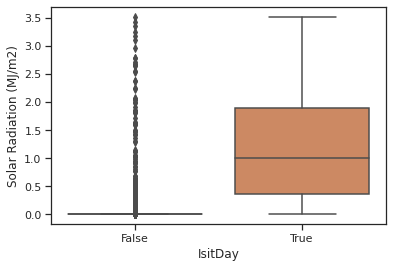

Solar Radiation (MJ/m2),0.00,0.01,0.02,0.03,0.04,0.05,0.06,0.07,0.08,0.09,0.10,0.11,0.12,0.13,0.14,0.15,0.16,0.17,0.18,0.19,0.20,0.21,0.22,0.23,0.24,0.25,0.26,0.27,0.28,0.29,0.30,0.31,0.32,0.33,0.34,0.35,0.36,0.37,0.38,0.39,...,3.03,3.04,3.05,3.06,3.07,3.08,3.09,3.10,3.11,3.12,3.13,3.14,3.15,3.16,3.17,3.18,3.19,3.20,3.21,3.23,3.24,3.25,3.26,3.27,3.28,3.29,3.30,3.31,3.32,3.33,3.34,3.35,3.36,3.39,3.41,3.42,3.44,3.45,3.49,3.52
IsitDay,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
False,3406,65,49,37,25,24,24,13,18,13,18,10,7,6,4,3,9,3,6,6,3,2,6,10,6,6,3,9,7,7,4,3,6,3,8,4,6,5,3,3,...,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1
True,183,39,21,22,16,21,25,20,16,16,13,27,17,20,21,15,22,20,22,21,20,24,16,18,9,17,19,14,13,17,10,16,13,8,19,13,18,8,12,17,...,3,3,5,2,2,2,3,6,4,5,2,4,2,2,7,6,2,3,6,2,7,1,5,1,3,2,1,1,1,2,2,1,2,2,2,4,1,1,1,2


In [ ]:
sns.set_theme(style="ticks", color_codes=True)
#sns.catplot(x="day", y="total_bill", data=bikedata["IsitDay"])
# We use scatter plot to show the correlation between Solar Radiation (MJ/m2) and IsitDay. As we could see in the graph, when IsitDay is TRUE,
# we have more solar radiation data and they tend to be higher. When IsitDay is FALSE, we have less solar radiation data and they tend to be lower.
#sns.scatterplot(x='IsitDay', y='Solar Radiation (MJ/m2)',data=bikedata, size=0.01)
sns.boxplot(x="IsitDay", y="Solar Radiation (MJ/m2)", data=bikedata)
plt.show()

pd.crosstab(bikedata.IsitDay, bikedata["Solar Radiation (MJ/m2)"])

3. We choose to remove those 4 attributes from our training set, so now we have total 9 attributes.

In [ ]:
bikedataRemove = bikedata
bikedataRemove.drop(["Rainfall(mm)", "Snowfall (cm)", "Visibility (10m)", "Dew point temperature(°C)"], axis = 1, inplace = True)

# display
bikedataRemove

,Date,Rented Bike Count,Temperature(°C),Humidity(%),Wind speed (m/s),Solar Radiation (MJ/m2),Seasons,Holiday,Functioning Day,IsitDay
0,4/1/2018,310,-3.1,41,2.0,0.00,Winter,No Holiday,Yes,False
1,11/11/2018,655,9.4,85,0.6,0.00,Autumn,No Holiday,Yes,False
2,27/05/2018,1727,20.6,41,2.3,0.09,Spring,No Holiday,Yes,False
3,12/7/2018,787,26.6,80,0.0,0.00,Summer,No Holiday,Yes,False
4,16/05/2018,225,22.0,97,0.9,0.00,Spring,No Holiday,Yes,False
...,...,...,...,...,...,...,...,...,...,...
7353,11/3/2018,596,7.8,28,1.9,0.04,Spring,No Holiday,Yes,False
7354,19/08/2018,1395,33.3,32,2.4,1.98,Summer,No Holiday,Yes,True
7355,1/10/2018,1824,15.4,63,2.1,0.00,Autumn,No Holiday,Yes,False
7356,8/11/2018,620,11.3,30,0.0,0.00,Autumn,No Holiday,Yes,True


***
## Section: 2.2 - Transform the attributes
- Consider transforming the remaining attributes (e.g., one hot encoding in case python classification models does not support nomial attribute), normalizing / scaling values, encoding labels (if necessary), etc.
- Describe what you chose to do (and not do), and why.
***

1. First we should do the data cleaning work to remove missing values, outliers and duplicates, then normalize the data.

In [ ]:

# Missing Values: Since our data set here is huge, so removing a few lines with missing values won't affect our anaysis
bikedataRemove = bikedataRemove.dropna()
bikedataRemove  # As we could see from the new data set, it has exactly the same number of rows as "bikedata", which means there is no
# missing value.

# Duplicates: we remove duplicates in the data set
bikedataRemove.drop_duplicates(inplace = True)
bikedataRemove
# Outliers: we use standard deviation to detect outliers and remove the rows
# Remove outliers for columns with numerical data
numeric_columns = bikedata.select_dtypes(include=[np.number]).columns
bikedata_noOutliers = bikedata[numeric_columns].apply(zscore)
# Add the rest of the columns with categorical data
bikedata_noOutliers["Seasons"] = bikedataRemove["Seasons"]
bikedata_noOutliers["Holiday"] = bikedataRemove["Holiday"]
bikedata_noOutliers["Functioning Day"] = bikedataRemove["Functioning Day"]
bikedata_noOutliers["IsitDay"] = bikedataRemove["IsitDay"]
bikedata_noOutliers

,Rented Bike Count,Temperature(°C),Humidity(%),Wind speed (m/s),Solar Radiation (MJ/m2),Seasons,Holiday,Functioning Day,IsitDay
0,-0.613590,-1.333968,-0.853299,0.269553,-0.656144,Winter,No Holiday,Yes,False
1,-0.082545,-0.286932,1.308660,-1.083293,-0.656144,Autumn,No Holiday,Yes,False
2,1.567544,0.651213,-0.853299,0.559448,-0.552180,Spring,No Holiday,Yes,False
3,0.120638,1.153790,1.062982,-1.663085,-0.656144,Summer,No Holiday,Yes,False
4,-0.744427,0.768481,1.898285,-0.793398,-0.656144,Spring,No Holiday,Yes,False
...,...,...,...,...,...,...,...,...,...
7353,-0.173361,-0.420952,-1.492059,0.172921,-0.609938,Spring,No Holiday,Yes,False
7354,1.056509,1.715001,-1.295518,0.656080,1.631054,Summer,No Holiday,Yes,True
7355,1.716852,0.215646,0.227680,0.366185,-0.656144,Autumn,No Holiday,Yes,False
7356,-0.136419,-0.127782,-1.393788,-1.663085,-0.656144,Autumn,No Holiday,Yes,True


2. We need one hot encoding because some algorithms in python implementation don't accept nominal features.

In [ ]:
  bikedata_nominal = bikedata_noOutliers[['Seasons', 'Holiday', 'Functioning Day', 'IsitDay']]
# Label encoding the data, converting categorical strings to numbers
bikedata_nominal['Seasons'] = LabelEncoder().fit_transform(bikedata_nominal['Seasons'])
bikedata_nominal['Holiday'] = LabelEncoder().fit_transform(bikedata_nominal['Holiday'])
bikedata_nominal['Functioning Day'] = LabelEncoder().fit_transform(bikedata_nominal['Functioning Day'])
bikedata_nominal['IsitDay'] = LabelEncoder().fit_transform(bikedata_nominal['IsitDay'])
bikedata_nominal
# Do one hot encoding to the above three columns
columnTransformer = ColumnTransformer([('encoder', OneHotEncoder(), [0])], remainder='passthrough')
bikedata_nominal = np.array(columnTransformer.fit_transform(bikedata_nominal), dtype = np.str)

# Convert the returned array to dataframe so that we could add it to our dataframe
my_array = bikedata_nominal
my_df = pd.DataFrame(my_array, columns = ['IsAutumn','IsSpring','IsSummer','IsWinter','Holiday','Functioning Day','IsitDay'])
print(my_df)




     IsAutumn IsSpring IsSummer IsWinter Holiday Functioning Day IsitDay
0         0.0      0.0      0.0      1.0     1.0             1.0     0.0
1         1.0      0.0      0.0      0.0     1.0             1.0     0.0
2         0.0      1.0      0.0      0.0     1.0             1.0     0.0
3         0.0      0.0      1.0      0.0     1.0             1.0     0.0
4         0.0      1.0      0.0      0.0     1.0             1.0     0.0
...       ...      ...      ...      ...     ...             ...     ...
7353      0.0      1.0      0.0      0.0     1.0             1.0     0.0
7354      0.0      0.0      1.0      0.0     1.0             1.0     1.0
7355      1.0      0.0      0.0      0.0     1.0             1.0     0.0
7356      1.0      0.0      0.0      0.0     1.0             1.0     1.0
7357      0.0      0.0      0.0      1.0     1.0             1.0     1.0

[7358 rows x 7 columns]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row

In [ ]:
# Drop the original columns with nominal string values
bikedata_noOutliers1 = bikedata_noOutliers
bikedata_noOutliers1.drop(["Seasons", "Holiday", "Functioning Day", "IsitDay"], axis = 1, inplace = True)
print(bikedata_noOutliers1)


      Rented Bike Count  ...  Solar Radiation (MJ/m2)
0             -0.613590  ...                -0.656144
1             -0.082545  ...                -0.656144
2              1.567544  ...                -0.552180
3              0.120638  ...                -0.656144
4             -0.744427  ...                -0.656144
...                 ...  ...                      ...
7353          -0.173361  ...                -0.609938
7354           1.056509  ...                 1.631054
7355           1.716852  ...                -0.656144
7356          -0.136419  ...                -0.656144
7357          -0.230314  ...                -0.552180

[7358 rows x 5 columns]


In [ ]:
# Add the newly generated nominal columns with numbers to our dataframe
bikedata_noOutliers1["IsAutumn"] = my_df["IsAutumn"]
bikedata_noOutliers1["IsSpring"] = my_df["IsSpring"]
bikedata_noOutliers1["IsSummer"] = my_df["IsSummer"]
bikedata_noOutliers1["IsWinter"] = my_df["IsWinter"]
bikedata_noOutliers1["Holiday"] = my_df["Holiday"]
bikedata_noOutliers1["Functioning Day"] = my_df["Functioning Day"]
bikedata_noOutliers1["IsitDay"] = my_df["IsitDay"]
print(bikedata_noOutliers1)

      Rented Bike Count  Temperature(°C)  ...  Functioning Day  IsitDay
0             -0.613590        -1.333968  ...              1.0      0.0
1             -0.082545        -0.286932  ...              1.0      0.0
2              1.567544         0.651213  ...              1.0      0.0
3              0.120638         1.153790  ...              1.0      0.0
4             -0.744427         0.768481  ...              1.0      0.0
...                 ...              ...  ...              ...      ...
7353          -0.173361        -0.420952  ...              1.0      0.0
7354           1.056509         1.715001  ...              1.0      1.0
7355           1.716852         0.215646  ...              1.0      0.0
7356          -0.136419        -0.127782  ...              1.0      1.0
7357          -0.230314        -0.647112  ...              1.0      1.0

[7358 rows x 12 columns]


***
# Section: 3 - Evaluation of the Off-The-Shelf KNN Classifier
- Select the KNN classifier from the SciKit Learn library and run it on the dataset.
***

***
## Section: 3.1 - Configure the off-the-shelf KNN classifier
- Use the KNeighborsClassifier from the SciKit Learn library
- Explain all setup, parameters and execution options you chose to set, and why.
***

In [ ]:
# Code in Section 3 is based on this tutorial: https://stackabuse.com/k-nearest-neighbors-algorithm-in-python-and-scikit-learn/
# Split our dataset into its attributes and labels
attributes = bikedata_noOutliers1.iloc[:, :-1].values
labels = bikedata_noOutliers1.iloc[:, 11].values
x_train, x_test, y_train, y_test = train_test_split(attributes, labels, test_size=0.20)
# Scale the features to normal
scaler = StandardScaler()
scaler.fit(x_train)
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)



***
## Section: 3.2 - Run and evaluate the classifier
- Try several values of the K parameter and compare the results.
- Evaluate the performance of the classifier, using the evaluation method you defined above.
***

In [ ]:
# Try with k = 7
KNN_classifier = KNeighborsClassifier(n_neighbors=7)
KNN_classifier.fit(x_train, y_train)
KNN_prediction = KNN_classifier.predict(x_test)
print(confusion_matrix(y_test, KNN_prediction))
print(classification_report(y_test, KNN_prediction))
print("Accuracy:",metrics.accuracy_score(y_test, KNN_prediction))

# Try with k = 16
KNN_classifier = KNeighborsClassifier(n_neighbors=16)
KNN_classifier.fit(x_train, y_train)
KNN_prediction = KNN_classifier.predict(x_test)
print(confusion_matrix(y_test, KNN_prediction))
print(classification_report(y_test, KNN_prediction))
print("Accuracy:",metrics.accuracy_score(y_test, KNN_prediction))

# Try with k = 40
KNN_classifier = KNeighborsClassifier(n_neighbors=40)
KNN_classifier.fit(x_train, y_train)
KNN_prediction = KNN_classifier.predict(x_test)
print(confusion_matrix(y_test, KNN_prediction))
print(classification_report(y_test, KNN_prediction))
print("Accuracy:",metrics.accuracy_score(y_test, KNN_prediction))

[[760  45]
 [131 536]]
              precision    recall  f1-score   support

         0.0       0.85      0.94      0.90       805
         1.0       0.92      0.80      0.86       667

    accuracy                           0.88      1472
   macro avg       0.89      0.87      0.88      1472
weighted avg       0.88      0.88      0.88      1472

Accuracy: 0.8804347826086957
[[776  29]
 [174 493]]
              precision    recall  f1-score   support

         0.0       0.82      0.96      0.88       805
         1.0       0.94      0.74      0.83       667

    accuracy                           0.86      1472
   macro avg       0.88      0.85      0.86      1472
weighted avg       0.87      0.86      0.86      1472

Accuracy: 0.8620923913043478
[[777  28]
 [203 464]]
              precision    recall  f1-score   support

         0.0       0.79      0.97      0.87       805
         1.0       0.94      0.70      0.80       667

    accuracy                           0.84      1472
 

As we can see from the evaluation, we got a descent accuracy of our learning algorithm, which is around 89% for k = 5. However, as we increase the value of k, the performace of our KNN model seems to go down a little bit.

Text(0, 0.5, 'Mean Error')

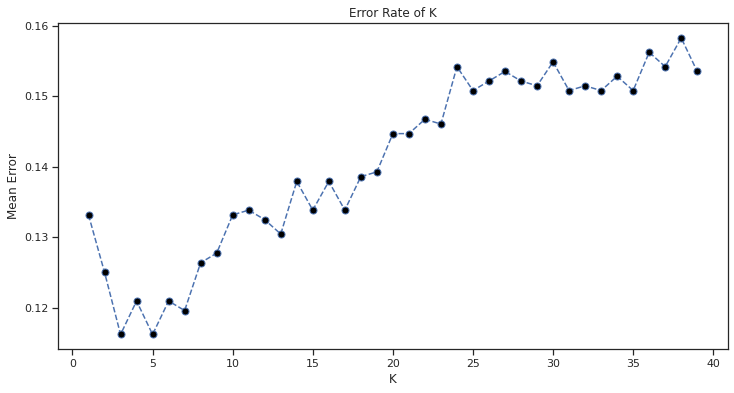

In [ ]:
# Calculate the mean of error for all the predicted values where k ranges from 1 and 40. Note that sqrt(1472) > 40
errors = []

# Calculating error for K values between 1 and 40
for i in range(1, 40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train, y_train)
    predict_i = knn.predict(x_test)
    errors.append(np.mean(predict_i != y_test))

# Plot the error values against K values
plt.figure(figsize=(12, 6))
plt.plot(range(1, 40), errors, linestyle='dashed', marker='o',markerfacecolor='black', markersize=7)
plt.title('Error Rate of K')
plt.xlabel('K')
plt.ylabel('Mean Error')

As we can see from the plot of the error rate of k, when k=7 or aorund, we have the most accurate prediction. After k=7, the prediction becomes less accurate as we increase the value of k.

***
## Section: 3.3 - Evaluate the choice of the KNN classifier
- What characteristics of the problem and data made KNN a good or bad choice?
***

- KNN tries to find all training example that are relatively similar to the attributes of the test examples, and it belons to "Lazy Learners", which delays the process of modeling the training data until it's needed to classify the test examples. "Lazy Learners" doesn't require much time on building the model because it makes predictions on local information, and this is good because I'm running this on Colab, runnig speed is important.


- We have more numerical attributes than nominal attributes, and we can normalize these attributes before calculating the distance. Because the classification
decisions are made locally, nearest-neighbor classifiers (with small values
of k) are quite susceptible to noise. However, since we are able to erase noise, duplicates and missing values, we know that our processes dataset is properly labeled and noise-free, which is suitable for KNN classifier. Besides, we ony have around 1.5k data points for training, which is relatively small.

All these properties make KNN a good choice here.

***
# Section: 4 - Evaluation of Off-The-Shelf Classifier #2
- As with the KNN classifier above, choose another classifier from the SciKit Learn library (Decision Tree, SVM, Logistic Regression, etc.) and run it on the dataset.
***

***
## Section: 4.1 - Configure the classifier
- Use the appropriate classifier from the SciKit Learn library.
- Explain all setup, parameters and execution options you chose to set, and why.
***

In [ ]:
# Code in Section 4 is based on this tutorial: https://stackabuse.com/decision-trees-in-python-with-scikit-learn/
# Train the Decision Tree algorithm
from sklearn.tree import DecisionTreeClassifier
DT_classifier = DecisionTreeClassifier()
DT_classifier.fit(x_train, y_train)

# Make predictions on the test data
DT_prediction = DT_classifier.predict(x_test)

# Evaluating the Decision Tree algorithm by confusion matrix
print(confusion_matrix(y_test, DT_prediction))
print(classification_report(y_test, DT_prediction))
print("Accuracy:",metrics.accuracy_score(y_test, DT_prediction))

[[753  52]
 [ 69 598]]
              precision    recall  f1-score   support

         0.0       0.92      0.94      0.93       805
         1.0       0.92      0.90      0.91       667

    accuracy                           0.92      1472
   macro avg       0.92      0.92      0.92      1472
weighted avg       0.92      0.92      0.92      1472

Accuracy: 0.9177989130434783


***
## Section: 4.2 - Run and evaluate the classifier
- Try several values of the parameters (if appropriate) and compare the results.
- Evaluate the performance of the classifier, using the evaluation method you defined above.
***

In [ ]:

# Try to optimize the performance of DT by changing the criterion
DT_classifier = DecisionTreeClassifier(criterion="entropy", max_depth=7)
DT_classifier.fit(x_train, y_train)
# Make predictions on the test data
DT_prediction = DT_classifier.predict(x_test)
# Evaluating the Decision Tree algorithm by confusion matrix
print(confusion_matrix(y_test, DT_prediction))
print(classification_report(y_test, DT_prediction))
print("Accuracy:",metrics.accuracy_score(y_test, DT_prediction))



[[759  46]
 [ 66 601]]
              precision    recall  f1-score   support

         0.0       0.92      0.94      0.93       805
         1.0       0.93      0.90      0.91       667

    accuracy                           0.92      1472
   macro avg       0.92      0.92      0.92      1472
weighted avg       0.92      0.92      0.92      1472

Accuracy: 0.9239130434782609


As we can see from the evaluation method above, the accuracy is around 91% for default criterion, which is good. When we change criterion to use entropy as measure and limit the max depth it goes down to 7, we get a slightly better accuracy of 92%, implies a little bit of improvement on performance.


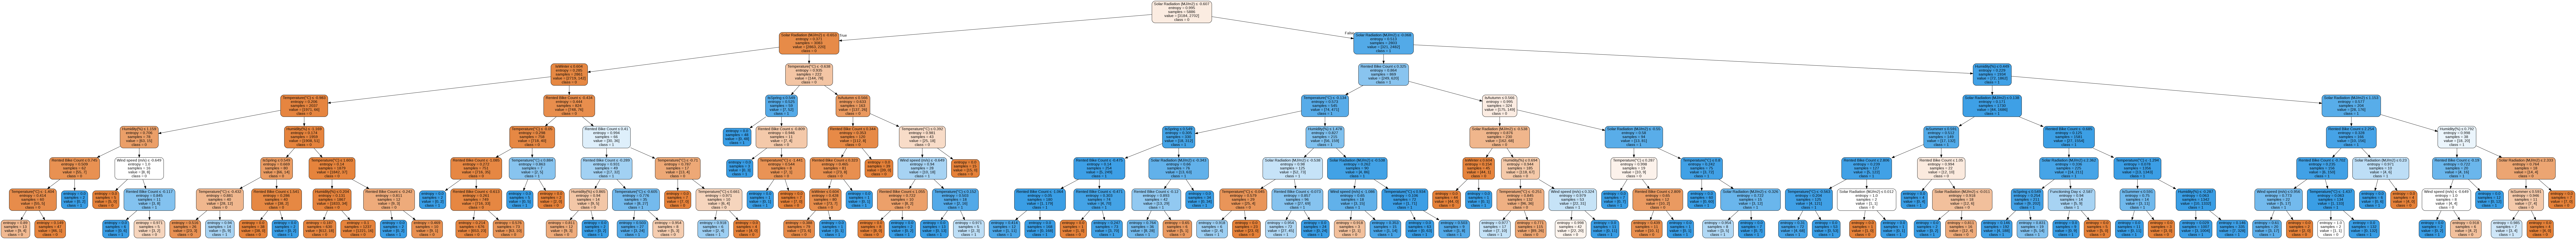

In [ ]:
# Let's do some visulization on our decision trees
dot_data = StringIO()
features = ['Rented Bike Count', 'Temperature(°C)',	'Humidity(%)',	'Wind speed (m/s)',	'Solar Radiation (MJ/m2)', 'IsAutumn', 'IsSpring', 'IsSummer', 'IsWinter',	'Holiday',	'Functioning Day']
export_graphviz(DT_classifier, out_file=dot_data, filled=True, rounded=True, special_characters=True, feature_names=features, class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png('DT_classify.png')
Image(graph.create_png())

Training AUC: {auc_train} Testing AUC: {auc_test}
[0.01293452 0.02857143 0.         ... 0.02857143 0.22608696 0.03402367]


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_ranking.py:813: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  UndefinedMetricWarning)


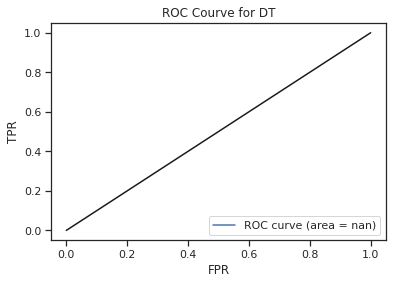

In [ ]:
# The code for plot ROC cruve is based on this tutorial: https://medium.com/swlh/how-to-code-and-evaluate-of-decision-trees-2d94093b3c1a
# Evaluate the Dicision Tree algorithm by ROC curve
# This function prints the AUC scores for training and testing set, and returns testing score
def get_auc_scores(classify, X_train, X_test, y_train, y_test):
 y_train_score = classify.predict_proba(X_train)[:, 1]
 y_test_score = classify.predict_proba(X_test)[:, 1]
 auc_train = roc_auc_score(y_train, y_train_score)
 auc_test = roc_auc_score(y_test, y_test_score)
 print("Training AUC: {auc_train} Testing AUC: {auc_test}")
 return y_test_score

yt_score = get_auc_scores(DT_classifier, x_train, x_test, y_train, y_test)
print(yt_score)
# This function plots ROC curve for testing data
def plot_roc_curve(y_test, y_test_score):

 #fpr, tpr= roc_curve(y_test, y_test_score)
 fpr, tpr, thresholds = metrics.roc_curve(y_test, y_test_score, pos_label=2)
 roc_auc = auc(fpr, tpr)
 plt.figure()
 plt.plot(fpr, tpr, label = "ROC curve (area = %0.2f)" % roc_auc)
 plt.plot([0, 1], [0, 1], "k-")
 plt.xlabel("FPR")
 plt.ylabel("TPR")
 plt.title("ROC Courve for DT")
 plt.legend(loc = "lower right")
 plt.show()

plot_roc_curve(y_test, yt_score)

The ROC curve for DT model should have been plotted somewhere above the diagonal on the upper left corner, according to the accuracy computed previously. But there's some logical error inside my code I hasn't found. Theoretically we'll have a curve that's above the diagonal. One way to evalute the performance of DT model is to see how close the ROC curve and the diagonal. The closer the ROC curve to the diagonal, the wrose permformance it has. If it's overlapping with diagonal, then our model is similar to random guessing.

***
## Section: 4.3 - Evaluate the choice of the classifier
- What characteristics of the problem and data made the classifier a good or bad choice?
***


- Decision trees can predict both continuous and discrete values, since we're doing classification, it's fine here.
- We don't need to spend a lot of time on training the DT model, which is useful because I'm doing my work on Colab. DT model has fast running speed.
- They can be used to classify non-linearly separable data.
- Decision tree induction does not require any prior assumptions regarding the type of probability distributions satisfied by the class, so it's more general and adaptable than some other techniques.
- Although it's sensitive to noise which could result in overfitting, but we're able to erase noisem duplicates and missing values before we build the model. So it doesn't affect.
- Decision trees are biased with imbalance dataset, and fortunately our class variable is pretty balanced, almost close to half and half.
All these characteristics above plus the 92% accuracy, I would say Decision Tree is a good classifier for our bikedata.

***
# Section: 5 - Evaluation of Off-The-Shelf Classifier #3
- As with the KNN classifier above, choose another classifier from the SciKit Learn library (Decision Tree, SVM, Logistic Regression, etc.) and run it on the dataset.
***

***
## Section: 5.1 - Configure the classifier
- Use the appropriate classifier from the SciKit Learn library.
- Explain all setup, parameters and execution options you chose to set, and why.
***

In [ ]:
# Code in Section 4 is based on this tutorial: https://stackabuse.com/the-naive-bayes-algorithm-in-python-with-scikit-learn/
# Split our dataset into its attributes and labels
attributes = bikedata_noOutliers1.iloc[:, :-1].values
labels = bikedata_noOutliers1.iloc[:, 11].values
x_train, x_test, y_train, y_test = train_test_split(attributes, labels, test_size=0.20)

#Create a Gaussian Classifier
G_classifier = GaussianNB()

# Train the model using the training sets
G_classifier.fit(attributes, labels)

#Predict the "IsitDay" class variable, '1.0' means TRUE and '0.0' means FALSE.
G_prediction = G_classifier.predict(x_test)
print("Predicted Value:", G_prediction)

Predicted Value: ['0.0' '0.0' '1.0' ... '0.0' '0.0' '0.0']


***
## Section: 5.2 - Run and evaluate the classifier
- Try several values of the parameters (if appropriate) and compare the results.
- Evaluate the performance of the classifier, using the evaluation method you defined above.
***

In [ ]:
# Evaluate our Naive Bayesian classifier using accuracy
print(np.mean(G_prediction == y_test))

# Evaluate our Naive Bayesian classifier using confusion matrix
print(confusion_matrix(y_test, G_prediction))

0.8301630434782609
[[776  51]
 [199 446]]


As we can see, the accuracy is around 83%, which is not so good, we need some improvement here. The confusion matrix tells us that the amount of errors is not so balanced between TRUE and FALSE.

***
## Section: 5.3 - Evaluate the choice of the classifier
- What characteristics of the problem and data made the classifier a good or bad choice?
***


- Naive Bayes works well with both numerical and categorical data. It can also be used to perform regression by using Gaussian Naive Bayes. But here we transform all the nominal data to numerical, so both are fine.
- Naive Bayes has low computation cost, which makes the running speed fast even when it's given a relatively large dataset. This is critical when I run my code on online editior like Colab. It can be used with multiple class prediction problems, which is good, but our class variable "IsitDay" is binary.
- When the assumption of independence holds, a Naive Bayes classifier performs better than others. However, some of the attributes data are not independent according to the correlation matrix. For example, "temperature" and "Rented Bikes Count" have a 0.5 correlation factor. In fact, for many dataset in the real world, it's extremely difficult to assume independence between attributes. This feature draws back the performance of Naive Bayesian classifier on our bikedata.
- There could be zero posterior probability if a training data doesn't fit in any particular class. Then the model is unable to make predictions. Especially when we miss certain combination of values in the training data, this problem will be clearer. Because I dropped some columns at the beginning according to the correlation matrix, I suspect that this affects the frequency-based probability estimate.

- Naive Bayes works well as long as the categories are kept simple. But it does not work when the relationship between words is important. For our bikedata, some of the weather data is correlated with each other.

Based on the characteristics of Naive Bayesian classifier above, and the accuracy value, I think it's a bad choice for bikedata.

***
# Section: 6 - Comparison of the Three Classifiers
***

***
## Section: 6.1 - Compare the performance of these classifiers to each other
- What are their strong and weak points?Configure the classifier
***

Most of the evaluation occurse at section 3.3, 4.3, and 5.3, including their strong and weak points, I'll restate them here.

Strong points:
- KNN tries belons to "Lazy Learners", which delays the process of modeling the training data until it's needed to classify the test examples. "Lazy Learners" doesn't require much time on building the model because it makes predictions on local information, and this is good because I'm running this on Colab, runnig speed is important. We have more numerical attributes than nominal attributes, and we can normalize these attributes before calculating the distance. Because the classification
decisions are made locally, nearest-neighbor classifiers (with small values
of k) are quite susceptible to noise. However, since we are able to erase noise, duplicates and missing values, we know that our processes dataset is properly labeled and noise-free, which is suitable for KNN classifier. Besides, we ony have around 1.5k data points for training, which is relatively small.

- Decision trees can predict both continuous and discrete values, since we're doing classification, it's fine here. We don't need to spend a lot of time on training the DT model, which is useful because I'm doing my work on Colab. DT model has fast running speed. They can be used to classify non-linearly separable data. Decision tree induction does not require any prior assumptions regarding the type of probability distributions satisfied by the class, so it's more general and adaptable than some other techniques.

- Naive Bayes works well with both numerical and categorical data. It can also be used to perform regression by using Gaussian Naive Bayes. But here we transform all the nominal data to numerical, so both are fine. Naive Bayes has low computation cost, which makes the running speed fast even when it's given a relatively large dataset. This is critical when I run my code on online editior like Colab. It can be used with multiple class prediction problems, which is good, but our class variable "IsitDay" is binary.

Weak points:
- KNN doesn't work well with high dimensional data because with large number of dimensions, it becomes difficult for the algorithm to calculate distance in each dimension. The KNN algorithm has a high prediction cost for large datasets.
Finally, the KNN algorithm doesn't work well with categorical features since it is difficult to find the distance between dimensions with categorical features.

- Decision Tree is sensitive to noise which could result in overfitting,It's also biased with imbalanced dataset

- Naiev Bayesian classifer doesn't perform well if attributes are dependant. In fact, for many dataset in the real world, it's extremely difficult to assume independence between attributes. There could be zero posterior probability if a training data doesn't fit in any particular class. Then the model is unable to make predictions. Especially when we miss certain combination of values in the training data, this problem will be clearer. It does not work when the relationship between words is important. For our bikedata, some of the weather data is correlated with each other.


***
## Section: 6.2 - Choose a Best Classifier
- Choose one of the three classifiers as best and explain why.
***

From the perspective of accuracy:
- KNN has 89% accuracy when k = 7
- Decision Tree has 92.3% accuracy when we change the cirterion: measure as entropy and maximum depth as 5
- Naiev Bayesian classifier has 83.2% accuracy

Therefore, Decision Tree classifier gives us the most accurate prediction.

From the perspective of running time or efficiency:
- All of them has relatively fast running speed and don't devote much time on building the model. So there's a tie.

From the perpective of the inner characteristics of these classifiers:
- Decision tree is the most suitable classifier, which means, most of the advantages it has coincides with our dataset. As for the disadvantages it has, such as sensitive to noise, biased when encountering imbalanced dataset, we can solve them during data processing phase.

Based on all the views above, I think Decision Tree is


***
# Section: 7 - Conclusions
- Write a paragraph on what you discovered or learned from this homework.
***

I think this homework gives me an opportunity to "get my hands dirty". During class time, we basically just learned about concepts of different classifiers and how to evaluate them. Those things are vague until I really try to analyze the dataset my own. I started to undertstand the drawbacks or limitations of each classifier I used here. Another thing is that I always heard people talk about machine learning and neural netweok such stuff, but don't really know how they work. They are like very difficult topics for me. I mean, indeed they are difficult. But after this homework, at least I can tell myself that I've done something on my own using those facy words people taking about. This gives me confidence for my further learning in data anlysis.



***
### END-OF-SUBMISSION
***